In [1]:
import sys
import numpy as np
import glob
import pandas as pd

import seaborn as sns
import PIL.Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

from IPython.display import Image
from IPython.core.display import HTML 


# Purpose
When I searching Trivago online, I saw it’s comparatively dainty to its competitors. The website provide comparison on Trivago’s media performance through Twitter, one of the easiest to reach data source. 

Then I wonder how would Trivago performs comparing to its competitor on the rising social media like Instagram.
So I write this small project for further exploring.

The following 3 graphs are from craft.co

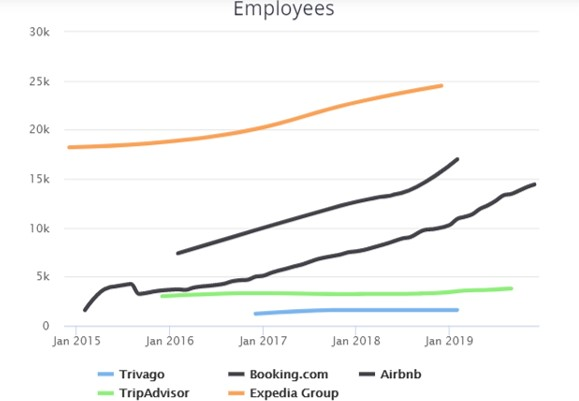

In [3]:
Image(filename = "img/employee.jpg")

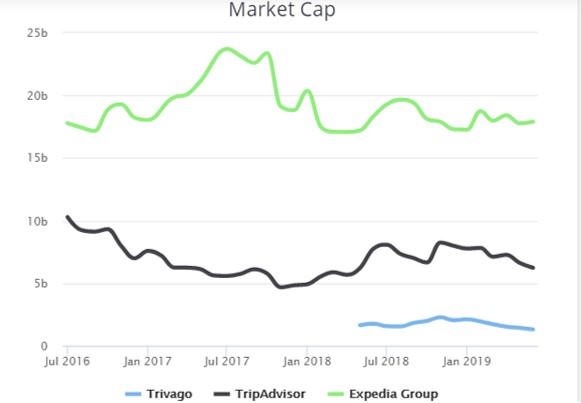

In [4]:
Image(filename = "img/market cap.jpg")

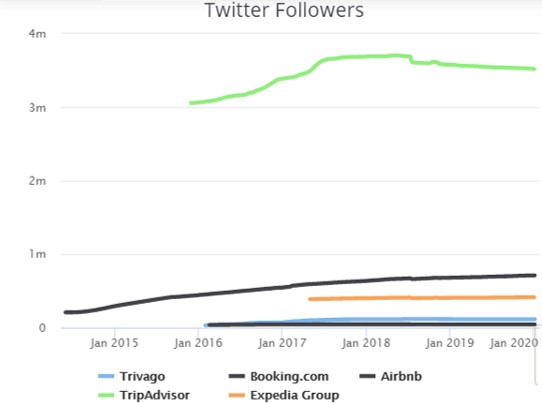

In [5]:
Image(filename = "img/twitter followers.jpg")

### 1 Data examination
Since it’s not highly related, so I put the crawling process in the other file and directly import the result for analysis here. 

In [6]:
extension = 'txt'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined = pd.concat([pd.read_csv(f, sep=";", header=None) for f in all_filenames ])

combined.columns = ["account", "image_url", "comment_cnt", "like_cnt", "caption"]
# pd.set_option('display.max_colwidth', -1)
combined.head()

,account,image_url,comment_cnt,like_cnt,caption
0,airbnb,https://scontent-dus1-1.cdninstagram.com/v/t51...,259,55267,The downside of a place as cozy as Superhost E...
1,airbnb,https://scontent-dus1-1.cdninstagram.com/v/t51...,106,35972,Superhost Kay’s apartment puts you in the hear...
2,airbnb,https://scontent-dus1-1.cdninstagram.com/v/t51...,194,34465,Superhosts Sara and Eric’s midcentury chalet i...
3,airbnb,https://scontent-dus1-1.cdninstagram.com/v/t51...,116,24118,"Surrounded by 17,000 foot peaks, Superhost Ash..."
4,airbnb,https://scontent-dus1-1.cdninstagram.com/v/t51...,317,48080,In the corner of Vermont known as the Northeas...


In [7]:
groups = combined.groupby('account')
print('\033[1m'+'Number of data recorded under each account''\033[0m')
print(groups['image_url'].count().sort_values(ascending=False))

print('\n')
print('\033[1m'+'Mean of like and comment count of post'+'\033[0m')
groups.mean()

Number of data recorded under each account
account
tripadvisor    1011
airbnb         1002
trivago         860
bookingcom      559
expedia         454
Name: image_url, dtype: int64


Mean of like and comment count of post


,comment_cnt,like_cnt
account,,
airbnb,184.281437,23717.258483
bookingcom,52.214669,2417.788909
expedia,27.508811,1129.601322
tripadvisor,90.416419,9101.539070
trivago,15.716279,717.655814


### 2 Using scatter plot to have a overview about like and comment of each post
From the plot we can see airbnb having obvious adavantage at instagram

Text(0, 0.5, 'comment_cnt')

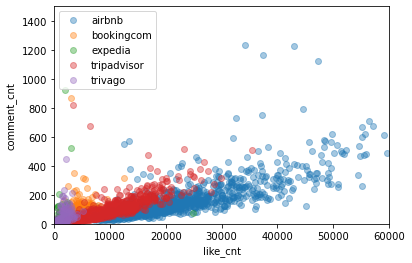

In [8]:
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.like_cnt,group.comment_cnt, 
            marker='o', linestyle='', alpha=0.4, 
            label=name)
ax.legend()
ax.set_xlim([0,60000])
ax.set_ylim([0,1500])
ax.set_xlabel('like_cnt')
ax.set_ylabel('comment_cnt')


### 3 Adjusting the result by the number of followers
This could be a unfair competition for Trivago since the fans base of each account is different, so let’s adjust the data by dividing by its followers.

This is just a very rough way of estimation, since followers will grow overtime.

We can see Expedia has a relatively strong performence after adjust.

Text(0, 0.5, 'comment_cnt to follower')

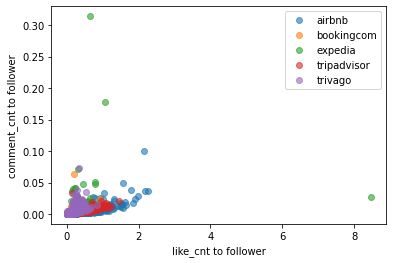

In [9]:
#manually adding follower number
follower_dict = {'airbnb': 4696217, 'bookingcom':1374806, 'expedia':293856, 'tripadvisor':2440634, 'trivago':620779}
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.like_cnt/follower_dict.get(name)*100, group.comment_cnt/follower_dict.get(name)*100, 
            marker='o', linestyle='', alpha=0.6, 
            label=name)
ax.legend()

ax.set_xlabel('like_cnt to follower')
ax.set_ylabel('comment_cnt to follower')


### 4 Using box plot to see the distribution of like and comment

The differnce in like number is more prominent than comment number. Tripadvisor have similar perfomance in comment section while its 25th quantile is close to bookingcom's mean which means it mange to maintain a much higher like number at most post than bookingcom.
<br><br>
The difference in like number is more prominent than comment number. Tripadvisor have similar performance in comment section while its 25th quantile is close to Booking.com's mean which means it mange to maintain a much higher like number at most post than Booking.com.
Even though Expedia has close fans size as trivago, its distribution is much more compact which suggest its performance across different post is more consistent than Trivago. 



Text(0.5, 1.0, 'comment_cnt distribution')

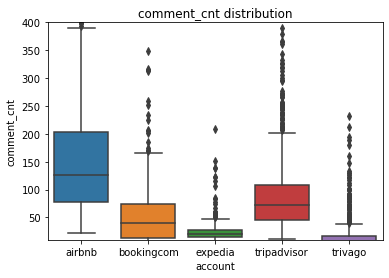

In [10]:
sns.boxplot(x='account', y='comment_cnt', data=combined)
plt.ylim(10, 400)
plt.title('comment_cnt distribution')


Text(0.5, 1.0, 'like_cnt distribution')

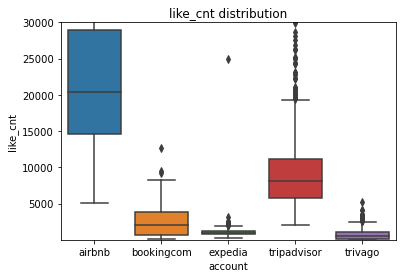

In [11]:
sns.boxplot(x='account', y='like_cnt', data=combined)
plt.ylim(10, 30000)
plt.title('like_cnt distribution')


### 5. Using world clould to have a quick view on text content of Trivago

(-0.5, 232.5, 173.5, -0.5)

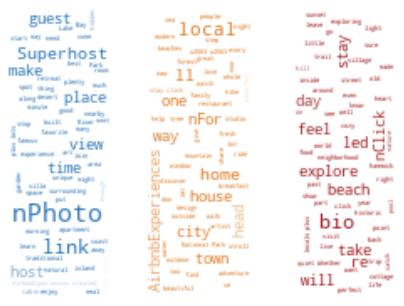

In [12]:
trivago = " ".join(t for t in combined[combined["account"]=="airbnb"].caption)

mask = np.array(PIL.Image.open("img/trivago.png"))
mask[mask == 48] = 255
wordcloud_por = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=1000, mask=mask).generate(trivago)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])

plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

### Short Conclusion
Even though Trivago does not have protruding performance on Instagram at this moment, it doesn’t mean it’s a problem. The resource distribution on marketing channel could be affected by various factors such as brand positioning. This is just a rough scratch suggesting the situation on one of the potential marketing channel.
<br><br>
And there are still tons of topic could be discussed based on Instagram data. For example, who are the common fans of these company and how do these fans act? What are people talking about when they mention this company in hashtags? How should the performance of affiliated post be evaluated? Et cetera.
